In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# from IPython.display import Image
import mplhep as hep
hep.style.use('ATLAS')
import os
from tqdm import tqdm
import h5py
import pandas as pd


In [2]:
def read_data_by_range(start_row, end_row):
    """
    读取指定行范围内的数据。

    :param file_path: 文件路径
    :param start_row: 开始行号（包含）
    :param end_row: 结束行号（不包含）
    :return: 返回指定行范围内的数据
    """
    # 文件路径
    file_path = './data/dAu_BRAHMS.csv' 
    # 读取指定行范围内的数据
    data = pd.read_csv(file_path, skiprows=range(0, start_row), nrows=end_row-start_row, header=None)
    data.columns = ['eta', 'dndeta', 'stat_plus', 'stat_minus', 'sys_plus', 'sys_minus']
    
    return data


###  data.columns = ['eta', 'dndeta', 'stat_plus', 'stat_minus', 'sys_plus', 'sys_minus']

In [3]:
# 读取中心度的数据
data_0_30 = read_data_by_range( 14, 42)
data_30_60 = read_data_by_range(49, 77)
data_60_80 = read_data_by_range(84, 112)
data_exp = np.array([data_0_30,data_30_60,data_60_80])

In [4]:
def plot_exp_data(data, label_text, color, mark):
    """
    绘制实验数据。

    :param data: 数据
    :param title: 图形标题
    :param color: 颜色
    """
    # 计算误差
    data['total_error_plus'] = np.sqrt(data['stat_plus']**2 + data['sys_plus']**2)
    data['total_error_minus'] = np.sqrt(data['stat_minus']**2 + data['sys_minus']**2)
    # 画图
#     plt.figure(figsize=(8, 4))  # 宽度为8英寸，高度为6英寸
    plt.errorbar(data['eta'], data['dndeta'], yerr=[data['total_error_minus'], data['total_error_plus']], fmt=mark, color=color, ecolor=color, capsize=3, label=label_text)
    plt.legend(fontsize=20)

In [6]:
def plot_dNdEta(m=0, n=20, eta_flat='1p0', eta_gw='1p3', event_range=[0, 300],
                para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0",
                nsampling=2000,fontsize=16, plot_errbar=True,
                HWF_or_DWF='HWF', color='blue'):
    """
    优化后的绘制 dN/dη 图的函数，适用于所有事件数据横坐标相同的情况。
    - 只需对所有事件的纵坐标求平均即可。
    """
    
    # 文件路径和文件名
    input_dir = f"/media/mengzhu/west16/d_Au_work2/d_Au_{HWF_or_DWF}/hydro_result_n_BC_check/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
    input_filename = "dNdEta_mc_charged.dat"

    # 初始化变量
    all_data = []
    event_count = 0

    # 遍历文件并加载数据
    for i in range(event_range[0], event_range[1]):
        input_path = os.path.join(input_dir, f"event{i}", input_filename)
        try:
            dNdEta = np.loadtxt(input_path)
            if len(all_data) == 0:  # 初始化 all_data
                all_data = dNdEta[:, 1]  # 只存储纵坐标
                x_values = dNdEta[:, 0]  # 横坐标（假设所有事件相同）
            else:
                all_data += dNdEta[:, 1]  # 累加纵坐标
            event_count += 1
        except Exception as e:
            print(f"无法处理文件 {input_path}: {e}")

    # 确保有数据可用
    if event_count > 0:
        # 计算平均值和标准误差
        bin_means = all_data / event_count  # 平均值
#         std_error = np.sqrt(all_data / event_count) / np.sqrt(event_count)  # 标准误差（假设泊松分布）
        std_error = 1 / np.sqrt(event_count)  # 标准误差（假设泊松分布）
        

        # 绘图
#         plt.figure(figsize=(8, 4))  # 宽度为8英寸，高度为6英寸
        if plot_errbar:
            plt.errorbar(x_values, bin_means, yerr= std_error*bin_means, fmt='-', color=color)
        else:
            plt.plot(x_values,  bin_means, color=color)

        plt.xlabel(r"$\rm \eta$", fontsize=fontsize, ha='center')
        plt.ylabel(r"$\rm dN/d\eta$", fontsize=fontsize, ha='center')

        plt.xlim(-6, 6)
    else:
        print("没有找到可处理的文件。")


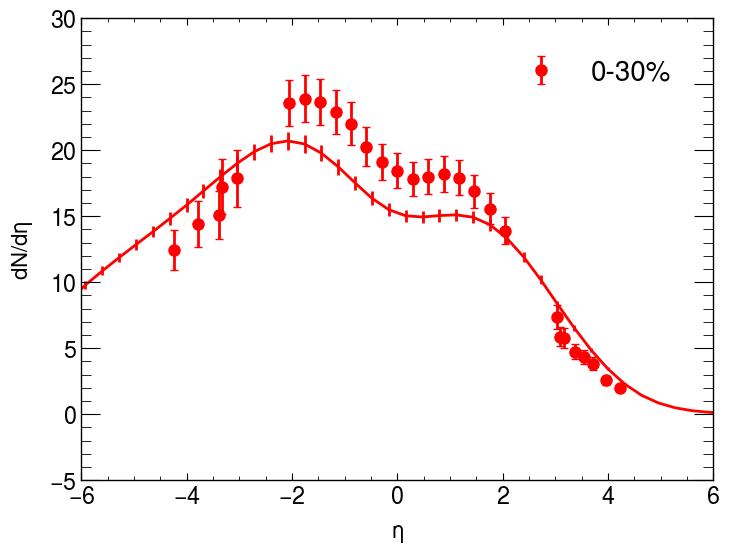

In [11]:
plot_dNdEta(m=0, n=30, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
                nsampling=2000,fontsize=16, 
                HWF_or_DWF='DWF', color='red')
plot_exp_data(data=data_0_30,label_text="0-30%",color="red",mark="o")


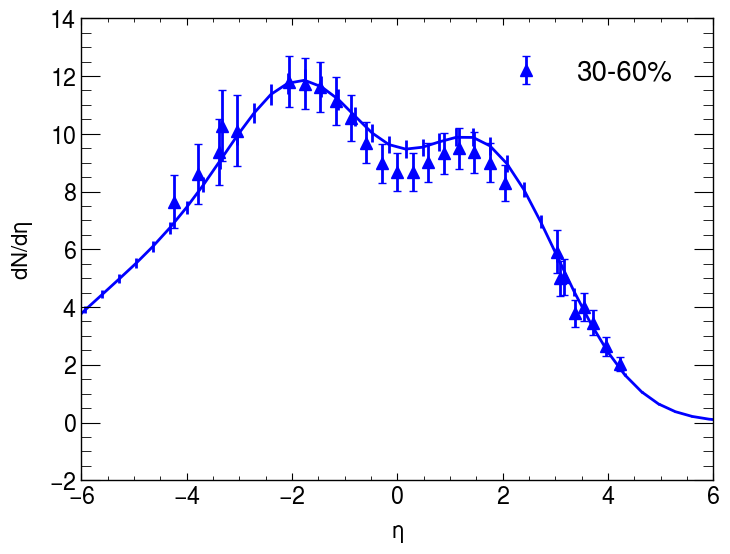

In [12]:
plot_dNdEta(m=30, n=60, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
                nsampling=2000,fontsize=16, 
                HWF_or_DWF='DWF', color='blue')
plot_exp_data(data=data_30_60,label_text="30-60%",color="blue",mark='^')


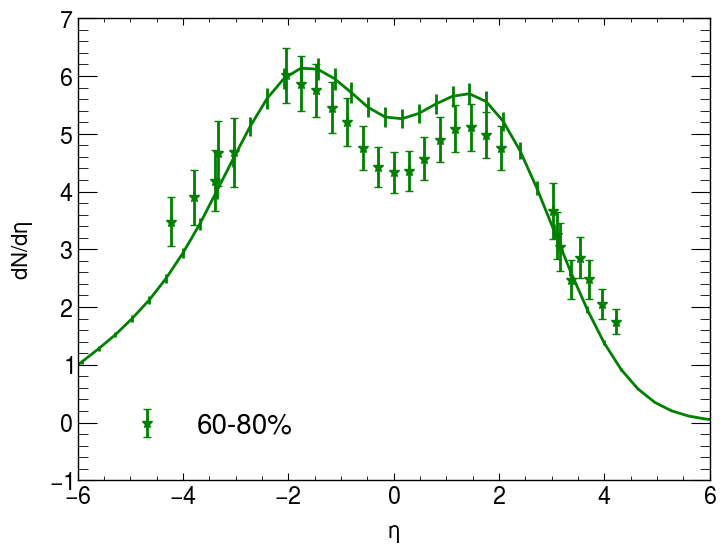

In [13]:
plot_dNdEta(m=60, n=80, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
                nsampling=2000,fontsize=16, 
                HWF_or_DWF='DWF', color='green')
plot_exp_data(data=data_60_80,label_text="60-80%",color="green",mark='*')

In [16]:
def plot_hydro_all_mark(
    eta_flat='1p3',eta_gw='1p3',
    para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p5_alpha_1p0_beta_0p35",
    nsampling=2000, event_range=[0,300],plot_errbar='true',label_para="para 1",
    HWF_or_DWF='HWF',fontsize=16, save_fig=False):
    
    # 用P_factor 、beta命名文件
    parts = para.split('_')
    if len(parts)==21:
        P_factor = parts[13] # 第13部分是 P_factor 的值
        beta = parts[17]     # 第17部分是 beta 的值
        delta_eta = parts[20]     # 第17部分是 delta_eta 的值
    elif len(parts)==18:
        P_factor = parts[13] # 第13部分是 P_factor 的值
        beta = parts[17]     # 第17部分是 beta 的值
        delta_eta = 'n_BC'     # 第17部分是 delta_eta 的值
    
    # 颜色列表，用于每个中心度的线条和散点保持一致
    colors = ['red','blue', 'green', 'orange', 'black', 'purple', 'cyan']
    labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
    markers = ['o', '^', 'v', '*','s', 'D']

     # 绘制实验数据
    plot_exp_data(data_0_30, '0-30%', 'red', 'o')
    plot_exp_data(data_30_60, '30-60%', 'blue', '^')
    plot_exp_data(data_60_80, '60-80%', 'green', '*')
    
    # 绘制模拟数据
    plot_dNdEta(m=0, n=30, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
                nsampling=2000,fontsize=16, HWF_or_DWF='DWF', color='red')
    plot_dNdEta(m=30, n=60, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
                nsampling=2000,fontsize=16, HWF_or_DWF='DWF', color='blue')
    plot_dNdEta(m=60, n=80, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
                nsampling=2000,fontsize=16, HWF_or_DWF='DWF', color='green')

    # 添加标识
    plt.text(0.05, 0.95, label_para[0], transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')
    plt.text(0.15, 0.95, fr'$ \beta$={label_para[1]}', transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')
    plt.text(0.30, 0.95, fr'$ \Delta \eta$={label_para[2]}', transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')

    plt.gcf().set_size_inches(8, 6)  # 调整当前图形的大小为宽10英寸，高6英寸
    if save_fig:
        plt.savefig(f'fig/dNdeta_check_P_factor_{P_factor}_beta_{beta}_delta_eta_{delta_eta}_new.pdf', bbox_inches='tight', pad_inches=0.0)

    plt.show()  # 在最后显示所有图像

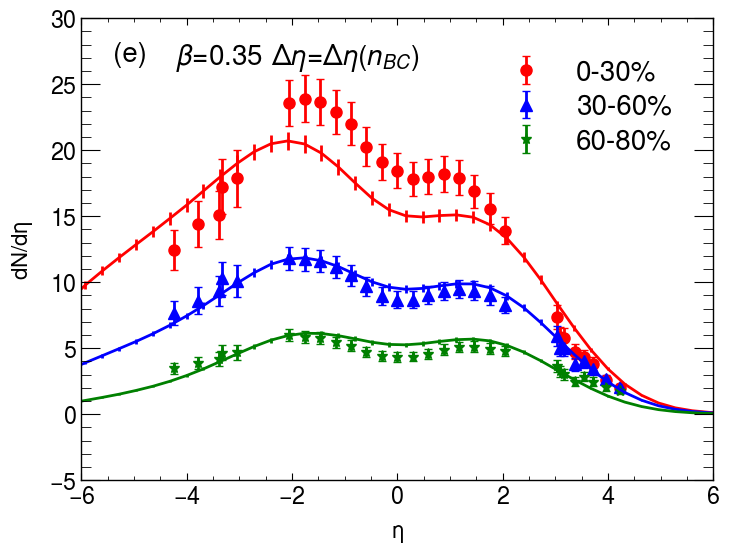

In [17]:
plot_hydro_all_mark(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
    HWF_or_DWF='DWF',event_range=[0,1000],nsampling=2000,plot_errbar=True,label_para=["(e)\n",'0.35','$ \Delta \eta(n_{BC})$'],
    eta_flat='1p3',eta_gw='1p3',fontsize=20,save_fig=True)

In [18]:
def plot_hydro_all_mark2(
    eta_flat='1p3',eta_gw='1p3',
    para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p5_alpha_1p0_beta_0p35",
    nsampling=2000, event_range=[0,300],plot_errbar='true',label_para="para 1",
    HWF_or_DWF='HWF',fontsize=16, save_fig=False):
    
    # 用P_factor 、beta命名文件
    parts = para.split('_')
    if len(parts)==21:
        P_factor = parts[13] # 第13部分是 P_factor 的值
        beta = parts[17]     # 第17部分是 beta 的值
        delta_eta = parts[20]     # 第17部分是 delta_eta 的值
    elif len(parts)==18:
        P_factor = parts[13] # 第13部分是 P_factor 的值
        beta = parts[17]     # 第17部分是 beta 的值
        delta_eta = 'n_BC'     # 第17部分是 delta_eta 的值
    
    # 颜色列表，用于每个中心度的线条和散点保持一致
    colors = ['red','blue', 'green', 'orange', 'black', 'purple', 'cyan']
    labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
    markers = ['o', '^', 'v', '*','s', 'D']

    # 绘制实验数据
    plot_exp_data(data_0_30, '0-30%', 'red', 'o')
    plot_exp_data(data_30_60, '30-60%', 'blue', '^')
    plot_exp_data(data_60_80, '60-80%', 'green', '*')
    
    # 绘制模拟数据
    plot_dNdEta(m=0, n=30, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
                nsampling=2000,fontsize=16, HWF_or_DWF='DWF', color='red')
    plot_dNdEta(m=30, n=60, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
                nsampling=2000,fontsize=16, HWF_or_DWF='DWF', color='blue')
    plot_dNdEta(m=60, n=80, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
                para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
                nsampling=2000,fontsize=16, HWF_or_DWF='DWF', color='green')

    # 添加标识
#     plt.text(0.05, 0.95, label_para[0], transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')
    plt.text(0.05, 0.95, fr'$ \beta$={label_para[0]}', transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')
    plt.text(0.20, 0.95, fr'$ \Delta \eta$={label_para[1]}', transform=plt.gca().transAxes, fontsize=fontsize, verticalalignment='top')

    plt.gcf().set_size_inches(8, 6)  # 调整当前图形的大小为宽10英寸，高6英寸
    if save_fig:
        plt.savefig(f'fig/dNdeta_check_P_factor_{P_factor}_beta_{beta}_delta_eta_{delta_eta}_new.pdf', bbox_inches='tight', pad_inches=0.0)

    plt.show()  # 在最后显示所有图像

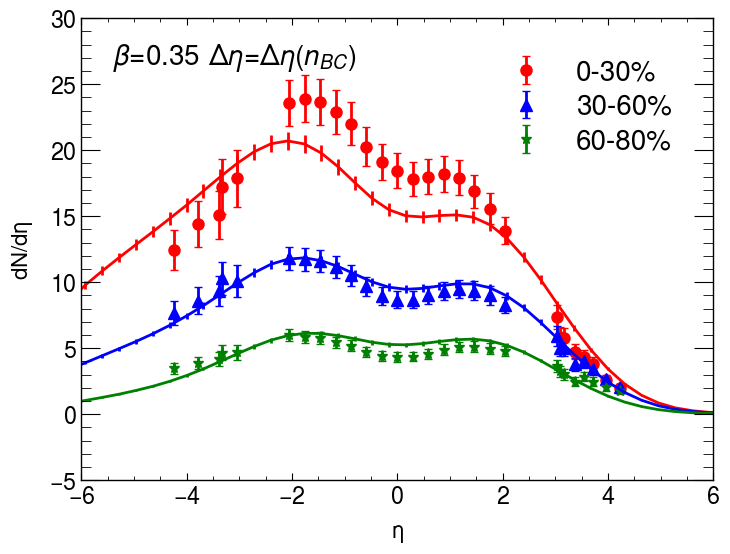

In [19]:
plot_hydro_all_mark2(
    para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
    HWF_or_DWF='DWF',event_range=[0,1000],nsampling=2000,plot_errbar=True,label_para=['0.35','$ \Delta \eta(n_{BC})$'],
    eta_flat='1p3',eta_gw='1p3',fontsize=20,save_fig=True)

In [176]:
def plot_exp_data2to1(ax, data, label_text, color, mark):
    """
    绘制实验数据。

    :param ax: 子图对象
    :param data: 数据
    :param label_text: 图例标签
    :param color: 颜色
    :param mark: 标记样式
    """
    # 计算误差
    data['total_error_plus'] = np.sqrt(data['stat_plus']**2 + data['sys_plus']**2)
    data['total_error_minus'] = np.sqrt(data['stat_minus']**2 + data['sys_minus']**2)
    # 画图
    ax.errorbar(data['eta'], data['dndeta'], yerr=[data['total_error_minus'], data['total_error_plus']], fmt=mark, color=color, ecolor=color, capsize=3, label=label_text)

def plot_dNdEta2to1(ax, m=0, n=20, eta_flat='1p0', eta_gw='1p3', event_range=[0, 300],
                para="entropy3D_y0_3p5_sigma_3p0_L_factor_2p5_R_factor_2p5_P_factor_5p0_alpha_1p0_beta_0p5_y_loss_0p0",
                nsampling=2000, fontsize=16, plot_errbar=True,
                HWF_or_DWF='HWF', color='blue'):
    """
    优化后的绘制 dN/dη 图的函数，适用于所有事件数据横坐标相同的情况。
    - 只需对所有事件的纵坐标求平均即可。
    """
    
    # 文件路径和文件名
    input_dir = f"/media/mengzhu/west16/d_Au_work/d_Au_{HWF_or_DWF}/hydro_result_n_BC_check/ebe_mc_nsampling_{nsampling}/plat_{eta_flat}_gw_{eta_gw}/{para}/dAu200/{m}_{n}/"
    input_filename = "dNdEta_mc_charged.dat"

    # 初始化变量
    all_data = []
    event_count = 0

    # 遍历文件并加载数据
    for i in range(event_range[0], event_range[1]):
        input_path = os.path.join(input_dir, f"event{i}", input_filename)
        try:
            dNdEta = np.loadtxt(input_path)
            if len(all_data) == 0:  # 初始化 all_data
                all_data = dNdEta[:, 1]  # 只存储纵坐标
                x_values = dNdEta[:, 0]  # 横坐标（假设所有事件相同）
            else:
                all_data += dNdEta[:, 1]  # 累加纵坐标
            event_count += 1
        except Exception as e:
            print(f"无法处理文件 {input_path}: {e}")

    # 确保有数据可用
    if event_count > 0:
        # 计算平均值和标准误差
        bin_means = all_data / event_count  # 平均值
        std_error = 1 / np.sqrt(event_count)  # 标准误差（假设泊松分布）
        
        # 绘图
        if plot_errbar:
            ax.errorbar(x_values, bin_means, yerr=std_error * bin_means, fmt='-', color=color)
        else:
            ax.plot(x_values, bin_means, color=color)


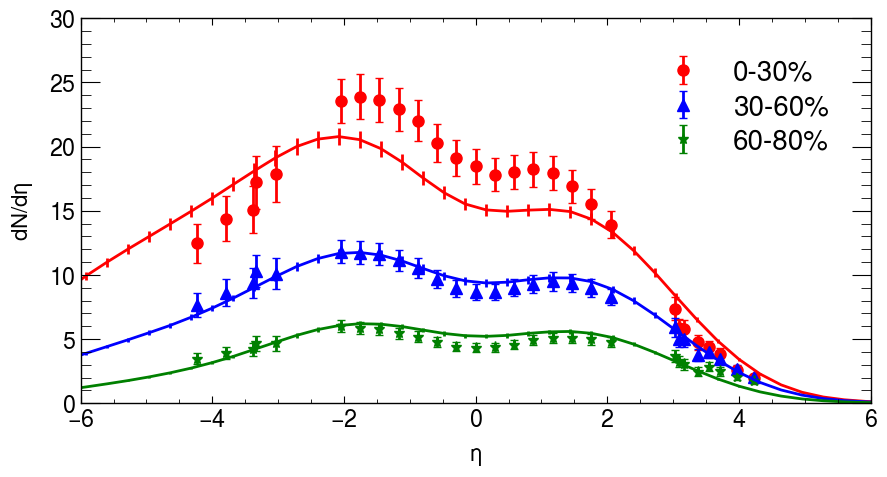

In [181]:
# 创建一个图形窗口
plt.figure(figsize=(10, 5))  # 宽度为8英寸，高度为6英寸
ax = plt.gca()

# 绘制实验数据
plot_exp_data(data_0_30, '0-30%', 'red', 'o')
plot_exp_data(data_30_60, '30-60%', 'blue', '^')
plot_exp_data(data_60_80, '60-80%', 'green', '*')
    
# 绘制模拟数据
plot_dNdEta(m=0, n=30, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
            para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
            nsampling=2000,fontsize=16, HWF_or_DWF='DWF', color='red')
plot_dNdEta(m=30, n=60, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
            para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
            nsampling=2000,fontsize=16, HWF_or_DWF='DWF', color='blue')
plot_dNdEta(m=60, n=80, eta_flat='1p3', eta_gw='1p3', event_range=[0, 1000],
            para="entropy3D_y0_4p0_sigma_2p5_L_factor_2p0_R_factor_2p0_P_factor_5p5_alpha_1p0_beta_0p35",
            nsampling=2000,fontsize=16, HWF_or_DWF='DWF', color='green')

# 设置图例和标签
ax.legend(fontsize=20)
ax.set_xlabel(r"$\rm \eta$", fontsize=16, ha='center')
ax.set_ylabel(r"$\rm dN/d\eta$", fontsize=16, ha='center')
ax.set_xlim(-6, 6)
ax.set_ylim(0, 30)


plt.show()